In [1]:
# Credit Risk Assessment: Model Interpretability
# Notebook 04: SHAP Analysis and Explainability

"""
OBJECTIVES:
1. Install and use SHAP for model interpretability
2. Understand global feature importance
3. Explain individual predictions
4. Create business-ready explanations
5. Calculate expected losses and business value
"""

# ============================================================================
# IMPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# SHAP for interpretability
import shap

# Display settings
pd.set_option('display.max_columns', None)

print("✅ All packages imported successfully!")
print(f"SHAP version: {shap.__version__}")

✅ All packages imported successfully!
SHAP version: 0.42.1


In [2]:
# ============================================================================
# 1. LOAD MODEL AND DATA
# ============================================================================
print("\n" + "="*80)
print("SECTION 1: LOADING MODEL AND DATA")
print("="*80)

# Load the best model (Random Forest)
rf_model = joblib.load('../models/random_forest.pkl')
print("✓ Random Forest model loaded")

# Load data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv')['target']
y_val = pd.read_csv('../data/processed/y_val.csv')['target']
y_test = pd.read_csv('../data/processed/y_test.csv')['target']

print(f"✓ Data loaded")
print(f"\nTraining set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

print(f"\nFeatures: {list(X_train.columns)}")


SECTION 1: LOADING MODEL AND DATA
✓ Random Forest model loaded
✓ Data loaded

Training set: (700, 20)
Validation set: (150, 20)
Test set: (150, 20)

Features: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']



SECTION 2: FEATURE IMPORTANCE (RANDOM FOREST)

Top 15 Most Important Features:
               feature  importance
       checking_status    0.176634
         credit_amount    0.123583
              duration    0.113409
                   age    0.076551
        credit_history    0.069342
               purpose    0.060361
        savings_status    0.054356
            employment    0.052079
    property_magnitude    0.050331
installment_commitment    0.044388
       residence_since    0.037388
   other_payment_plans    0.030665
       personal_status    0.026952
         own_telephone    0.018013
                   job    0.017950


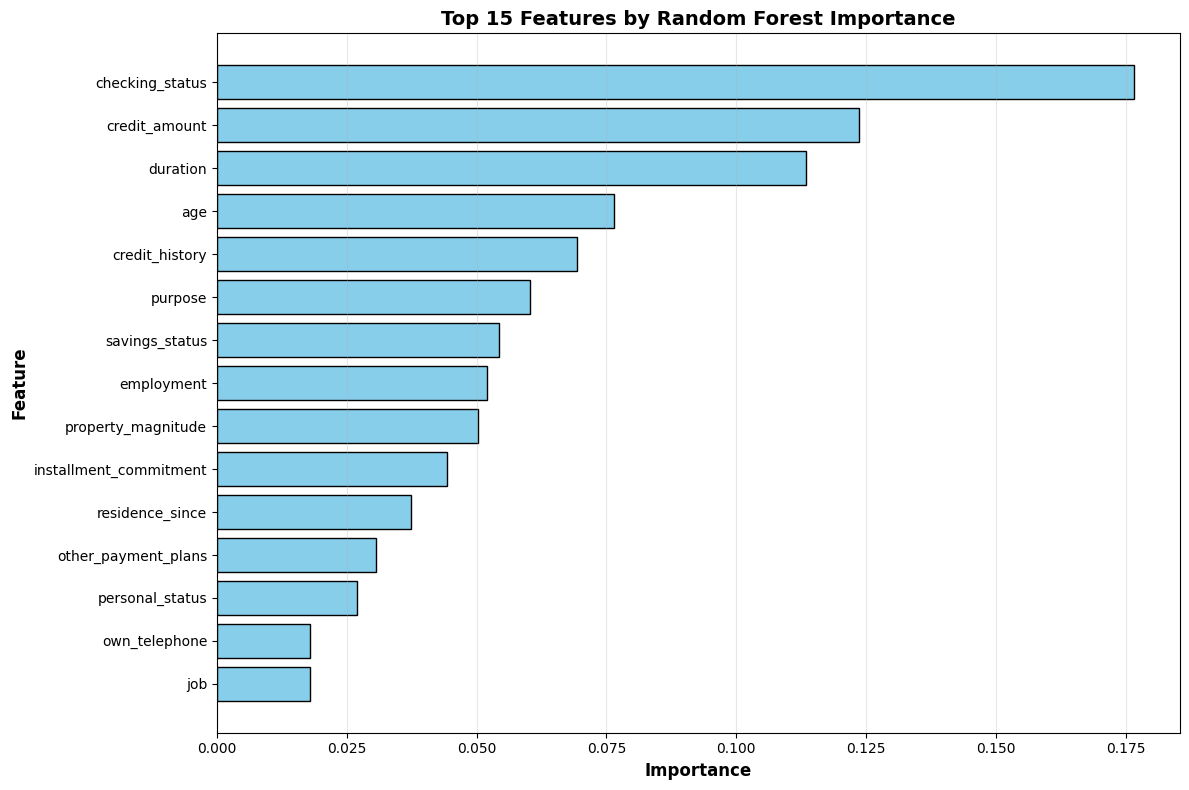


✓ Basic feature importance analyzed!


In [3]:
# ============================================================================
# 2. BASIC FEATURE IMPORTANCE
# ============================================================================
print("\n" + "="*80)
print("SECTION 2: FEATURE IMPORTANCE (RANDOM FOREST)")
print("="*80)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Top 15 Features by Random Forest Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Basic feature importance analyzed!")

In [4]:
# ============================================================================
# 3. INITIALIZE SHAP EXPLAINER
# ============================================================================
print("\n" + "="*80)
print("SECTION 3: SHAP ANALYSIS SETUP")
print("="*80)

print("\nInitializing SHAP TreeExplainer...")
print("(This may take 30-60 seconds...)")

# Create SHAP explainer for tree-based model
explainer = shap.TreeExplainer(rf_model)

print("✓ SHAP explainer created!")

# Calculate SHAP values for validation set (using sample for speed)
# Use smaller sample for faster computation
sample_size = 100
X_val_sample = X_val.sample(n=min(sample_size, len(X_val)), random_state=42)

print(f"\nCalculating SHAP values for {len(X_val_sample)} samples...")
print("(This may take 1-2 minutes...)")

shap_values = explainer.shap_values(X_val_sample)

print("✓ SHAP values calculated!")
print(f"\nSHAP values shape: {shap_values[1].shape}")
print("  (samples × features)")


SECTION 3: SHAP ANALYSIS SETUP

Initializing SHAP TreeExplainer...
(This may take 30-60 seconds...)
✓ SHAP explainer created!

Calculating SHAP values for 100 samples...
(This may take 1-2 minutes...)
✓ SHAP values calculated!

SHAP values shape: (100, 20)
  (samples × features)



SECTION 4: GLOBAL SHAP FEATURE IMPORTANCE
SHAP values type: <class 'list'>
SHAP values length: 2
SHAP values for class 1 shape: (100, 20)


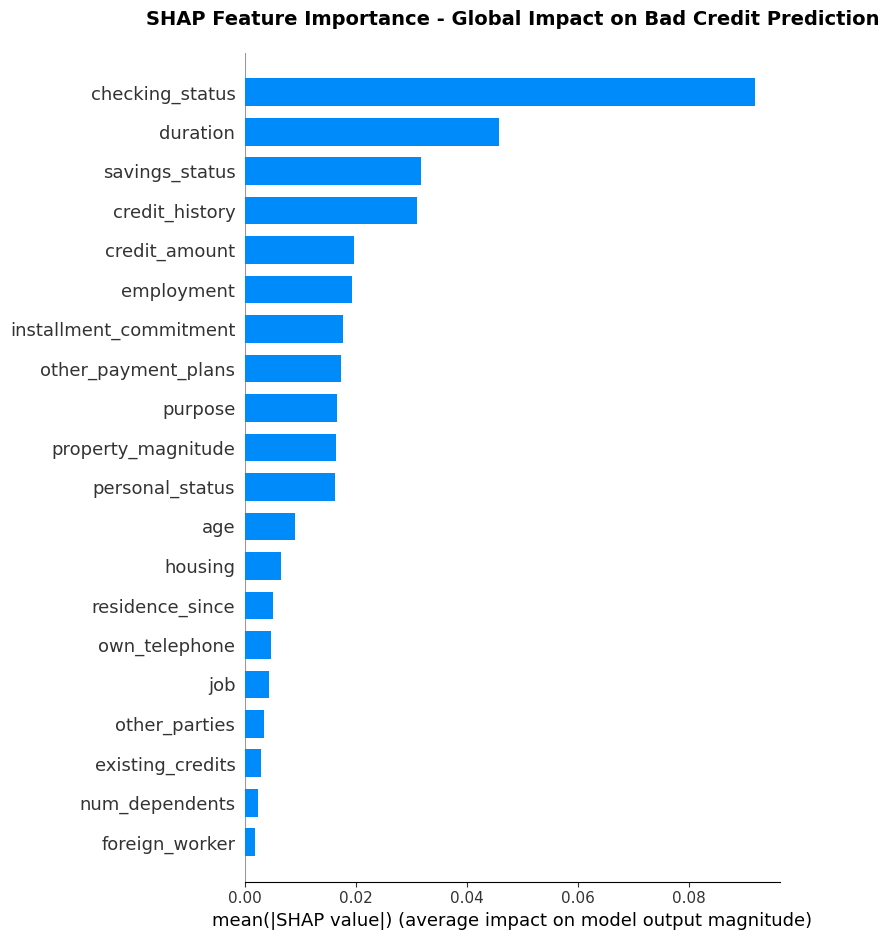


 Global feature importance visualized!


In [5]:
# ============================================================================
# 4. GLOBAL FEATURE IMPORTANCE (SHAP)
# ============================================================================
print("\n" + "="*80)
print("SECTION 4: GLOBAL SHAP FEATURE IMPORTANCE")
print("="*80)

# For Random Forest, shap_values is a list: [class_0_values, class_1_values]
# We want class 1 (bad credit) predictions
print(f"SHAP values type: {type(shap_values)}")
print(f"SHAP values length: {len(shap_values)}")

# Get SHAP values for class 1 (bad credit)
if isinstance(shap_values, list):
    shap_values_class1 = shap_values[1]
else:
    shap_values_class1 = shap_values

print(f"SHAP values for class 1 shape: {shap_values_class1.shape}")

# Summary plot (bar) - Feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_class1, X_val_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Global Impact on Bad Credit Prediction', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n Global feature importance visualized!")


SECTION 5: DETAILED SHAP ANALYSIS


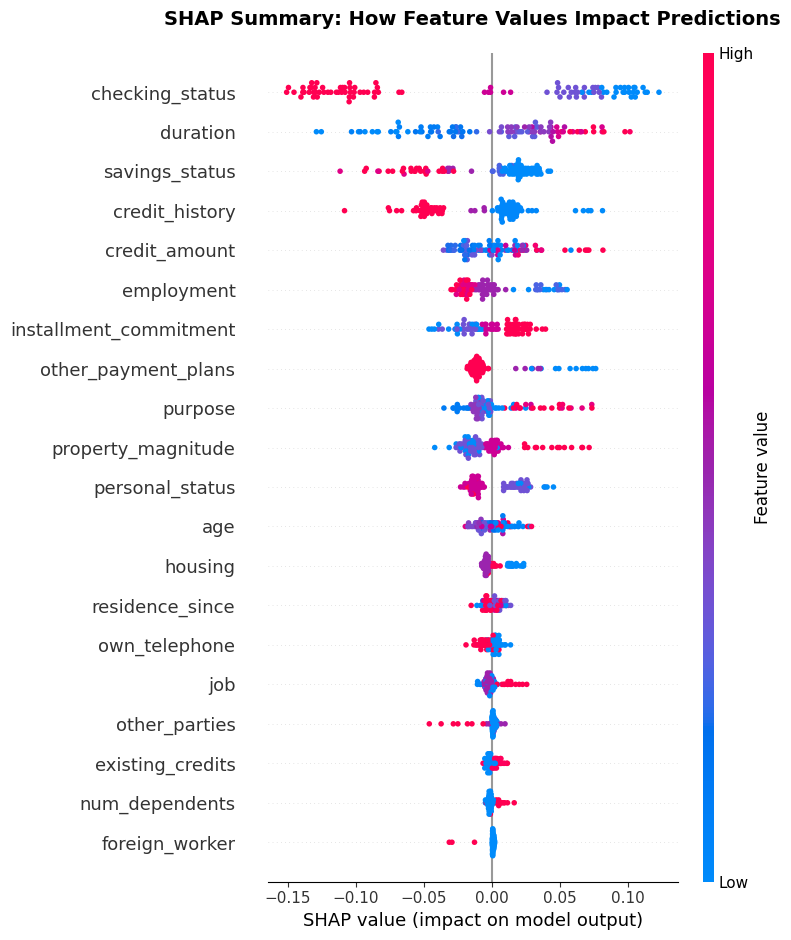


✓ Detailed SHAP summary created!

📊 How to read this plot:
  • Each dot = one sample
  • Red = high feature value, Blue = low feature value
  • Right = increases bad credit probability
  • Left = decreases bad credit probability


In [6]:
# ============================================================================
# 5. DETAILED SHAP SUMMARY PLOT
# ============================================================================
print("\n" + "="*80)
print("SECTION 5: DETAILED SHAP ANALYSIS")
print("="*80)

# Detailed summary plot showing feature values and their impact
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values_class1, X_val_sample, show=False)
plt.title('SHAP Summary: How Feature Values Impact Predictions', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Detailed SHAP summary created!")
print("\n📊 How to read this plot:")
print("  • Each dot = one sample")
print("  • Red = high feature value, Blue = low feature value")
print("  • Right = increases bad credit probability")
print("  • Left = decreases bad credit probability")

In [7]:
# ============================================================================
# 6. EXPLAIN INDIVIDUAL PREDICTIONS
# ============================================================================
print("\n" + "="*80)
print("SECTION 6: INDIVIDUAL PREDICTION EXPLANATIONS")
print("="*80)

# Select specific examples to explain
# Let's pick one that was APPROVED and one that was REJECTED

# Get predictions for sample
y_pred_proba = rf_model.predict_proba(X_val_sample)[:, 1]
y_pred = (y_pred_proba >= 0.25).astype(int)  # Using optimal threshold

# Find examples
approved_idx = np.where(y_pred == 0)[0][0]  # First approved application
rejected_idx = np.where(y_pred == 1)[0][0]  # First rejected application

print(f"\n📋 Example 1: APPROVED Application (Index {approved_idx})")
print(f"   Predicted probability of default: {y_pred_proba[approved_idx]:.3f}")
print(f"   Decision: APPROVED (below 0.25 threshold)")

print(f"\n📋 Example 2: REJECTED Application (Index {rejected_idx})")
print(f"   Predicted probability of default: {y_pred_proba[rejected_idx]:.3f}")
print(f"   Decision: REJECTED (above 0.25 threshold)")

# Get actual outcomes
actual_approved = y_val.iloc[X_val_sample.index[approved_idx]]
actual_rejected = y_val.iloc[X_val_sample.index[rejected_idx]]

print(f"\n✓ Actual outcome for approved: {'Bad (Default)' if actual_approved == 1 else 'Good (Repaid)'}")
print(f"✓ Actual outcome for rejected: {'Bad (Default)' if actual_rejected == 1 else 'Good (Repaid)'}")


SECTION 6: INDIVIDUAL PREDICTION EXPLANATIONS

📋 Example 1: APPROVED Application (Index 3)
   Predicted probability of default: 0.215
   Decision: APPROVED (below 0.25 threshold)

📋 Example 2: REJECTED Application (Index 0)
   Predicted probability of default: 0.357
   Decision: REJECTED (above 0.25 threshold)

✓ Actual outcome for approved: Good (Repaid)
✓ Actual outcome for rejected: Good (Repaid)



SECTION 7: EXPLAINING AN APPROVED APPLICATION

📋 APPROVED Application (Sample Index 3)
   Predicted probability of default: 0.215
   Decision: APPROVED (below 0.25 threshold)

📊 Top 10 Feature Contributions:
----------------------------------------------------------------------
 1. checking_status      =     1.13  ↓ SAFE  ████
 2. savings_status       =     1.83  ↓ SAFE  ██
 3. purpose              =     2.09  ↑ RISK  ██
 4. duration             =     1.25  ↑ RISK  █
 5. employment           =     1.34  ↓ SAFE  █
 6. credit_amount        =     1.47  ↑ RISK  █
 7. credit_history       =    -0.50  ↑ RISK  █
 8. other_payment_plans  =     0.46  ↓ SAFE  █
 9. property_magnitude   =    -0.34  ↓ SAFE  █
10. personal_status      =     0.45  ↓ SAFE  █


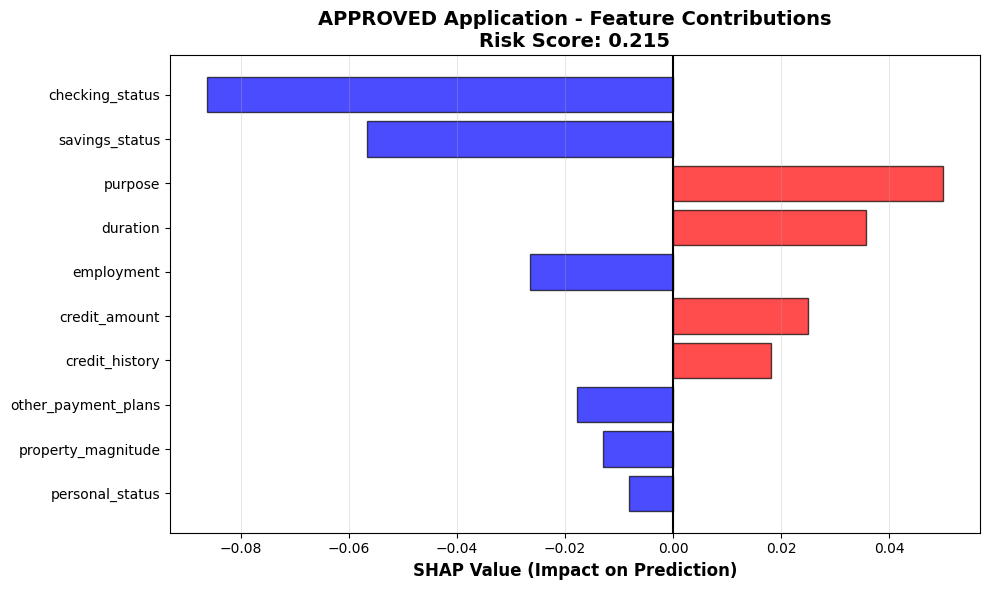


✓ Explanation complete!


In [8]:
# ============================================================================
# 7. EXPLAINING AN APPROVED APPLICATION
# ============================================================================
print("\n" + "="*80)
print("SECTION 7: EXPLAINING AN APPROVED APPLICATION")
print("="*80)

# Get predictions
y_pred_proba = rf_model.predict_proba(X_val_sample)[:, 1]
y_pred = (y_pred_proba >= 0.25).astype(int)

# Find an approved example
approved_indices = np.where(y_pred == 0)[0]
if len(approved_indices) > 0:
    approved_idx = approved_indices[0]
    
    print(f"\n📋 APPROVED Application (Sample Index {approved_idx})")
    print(f"   Predicted probability of default: {y_pred_proba[approved_idx]:.3f}")
    print(f"   Decision: APPROVED (below 0.25 threshold)")
    
    # Get contributions
    features = X_val_sample.columns.tolist()
    values = X_val_sample.iloc[approved_idx].values.flatten()  # Flatten to 1D
    impacts = shap_values_class1[approved_idx].flatten()  # Flatten to 1D
    abs_impacts = np.abs(impacts)
    
    # Sort by absolute impact
    sorted_indices = np.argsort(abs_impacts)[::-1]
    
    print("\n📊 Top 10 Feature Contributions:")
    print("-"*70)
    
    for i in range(min(10, len(sorted_indices))):
        idx = int(sorted_indices[i])
        feat = features[idx]
        val = float(values[idx])  # Now it's a scalar
        impact = float(impacts[idx])  # Now it's a scalar
        
        direction = "↑ RISK" if impact > 0 else "↓ SAFE"
        bar_length = max(1, int(abs(impact) * 50))
        bar = "█" * bar_length
        
        print(f"{i+1:2d}. {feat:20s} = {val:8.2f}  {direction}  {bar}")
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    
    # Get top 10 for plotting
    top_10_indices = sorted_indices[:10]
    top_features = [features[int(i)] for i in top_10_indices]
    top_impacts = [float(impacts[int(i)]) for i in top_10_indices]
    colors = ['red' if x > 0 else 'blue' for x in top_impacts]
    
    plt.barh(range(len(top_features)), top_impacts, color=colors, alpha=0.7, edgecolor='black')
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('SHAP Value (Impact on Prediction)', fontsize=12, fontweight='bold')
    plt.title(f'APPROVED Application - Feature Contributions\nRisk Score: {y_pred_proba[approved_idx]:.3f}', 
              fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Explanation complete!")
else:
    print("⚠️ No approved applications in sample")


SECTION 8: EXPLAINING A REJECTED APPLICATION

📋 REJECTED Application (Sample Index 0)
   Predicted probability of default: 0.357
   Decision: REJECTED (above 0.25 threshold)

🔍 Debug Info:
   Features: 20
   Values: 20
   Impacts: 20

📊 Top 10 Feature Contributions:
----------------------------------------------------------------------
 1. credit_history       =     1.34  ↓ SAFE  ███
 2. checking_status      =    -0.46  ↑ RISK  ██
 3. employment           =    -1.97  ↑ RISK  ██
 4. savings_status       =    -0.70  ↑ RISK  █
 5. other_payment_plans  =    -0.96  ↑ RISK  █
 6. property_magnitude   =    -0.34  ↓ SAFE  █
 7. personal_status      =     0.45  ↓ SAFE  █
 8. residence_since      =     1.05  ↓ SAFE  █
 9. credit_amount        =     1.45  ↑ RISK  █
10. job                  =     1.68  ↑ RISK  █


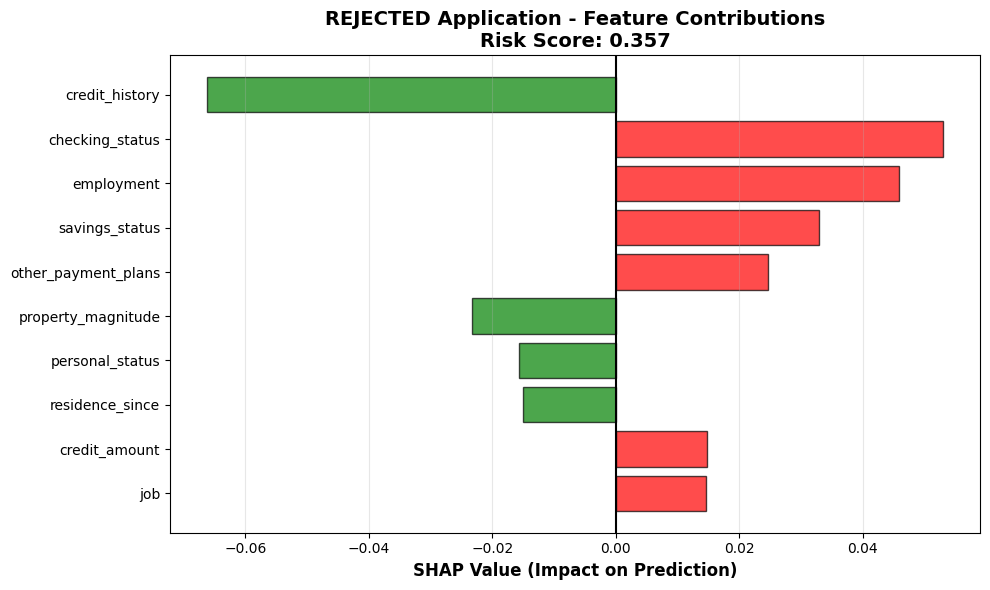


✓ Explanation complete!


In [9]:
# ============================================================================
# 8. EXPLAINING A REJECTED APPLICATION
# ============================================================================
print("\n" + "="*80)
print("SECTION 8: EXPLAINING A REJECTED APPLICATION")
print("="*80)

# Find a rejected example
rejected_indices = np.where(y_pred == 1)[0]
if len(rejected_indices) > 0:
    rejected_idx = rejected_indices[0]
    
    print(f"\n📋 REJECTED Application (Sample Index {rejected_idx})")
    print(f"   Predicted probability of default: {y_pred_proba[rejected_idx]:.3f}")
    print(f"   Decision: REJECTED (above 0.25 threshold)")
    
    # Get contributions
    features = X_val_sample.columns.tolist()
    values = X_val_sample.iloc[rejected_idx].values.flatten()
    
    # FIX: Handle SHAP values correctly based on their structure
    if len(shap_values_class1.shape) == 2:
        # If 2D: [samples, features]
        impacts = shap_values_class1[rejected_idx].flatten()
    elif len(shap_values_class1.shape) == 3:
        # If 3D: [samples, features, classes] - take the last class
        impacts = shap_values_class1[rejected_idx, :, -1].flatten()
    else:
        # If 1D or other, just flatten
        impacts = np.array(shap_values_class1[rejected_idx]).flatten()
    
    # CRITICAL: Verify dimensions match
    print(f"\n🔍 Debug Info:")
    print(f"   Features: {len(features)}")
    print(f"   Values: {len(values)}")
    print(f"   Impacts: {len(impacts)}")
    
    # Ensure all arrays have same length
    min_len = min(len(features), len(values), len(impacts))
    features = features[:min_len]
    values = values[:min_len]
    impacts = impacts[:min_len]
    
    abs_impacts = np.abs(impacts)
    
    # Sort by absolute impact
    sorted_indices = np.argsort(abs_impacts)[::-1]
    
    print("\n📊 Top 10 Feature Contributions:")
    print("-"*70)
    
    for i in range(min(10, len(sorted_indices))):
        idx = int(sorted_indices[i])
        feat = features[idx]
        val = float(values[idx])
        impact = float(impacts[idx])
        
        direction = "↑ RISK" if impact > 0 else "↓ SAFE"
        bar_length = max(1, min(20, int(abs(impact) * 50)))  # Cap at 20 chars
        bar = "█" * bar_length
        
        print(f"{i+1:2d}. {feat:20s} = {val:8.2f}  {direction}  {bar}")
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    
    top_10_indices = sorted_indices[:10]
    top_features = [features[int(i)] for i in top_10_indices]
    top_impacts = [float(impacts[int(i)]) for i in top_10_indices]
    colors = ['red' if x > 0 else 'green' for x in top_impacts]
    
    plt.barh(range(len(top_features)), top_impacts, color=colors, alpha=0.7, edgecolor='black')
    plt.yticks(range(len(top_features)), top_features, fontsize=10)
    plt.xlabel('SHAP Value (Impact on Prediction)', fontsize=12, fontweight='bold')
    plt.title(f'REJECTED Application - Feature Contributions\nRisk Score: {y_pred_proba[rejected_idx]:.3f}', 
              fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Explanation complete!")
else:
    print("⚠️ No rejected applications in sample")


SECTION 9: BUSINESS IMPACT ANALYSIS
✓ Created y_val_sample with 100 samples

📊 Confusion Matrix:
   True Negatives (TN):    46 - Correctly approved good borrowers
   False Positives (FP):   25 - Incorrectly rejected good borrowers
   False Negatives (FN):    5 - Incorrectly approved bad borrowers
   True Positives (TP):    24 - Correctly rejected bad borrowers

💰 Financial Impact:
   Profit from approved good loans: $23,000.00
   Loss from approved bad loans:    $40,000.00
   Opportunity cost (rejected good): $12,500.00
   NET PROFIT:                       $-29,500.00

📈 Threshold Sensitivity Analysis:
----------------------------------------------------------------------
Threshold 0.15: Net Profit = $  -29,500.00 | Approved =   24 | Rejected =   76
Threshold 0.20: Net Profit = $  -33,500.00 | Approved =   38 | Rejected =   62
Threshold 0.25: Net Profit = $  -29,500.00 | Approved =   51 | Rejected =   49
Threshold 0.30: Net Profit = $  -49,500.00 | Approved =   58 | Rejected =   42
Th

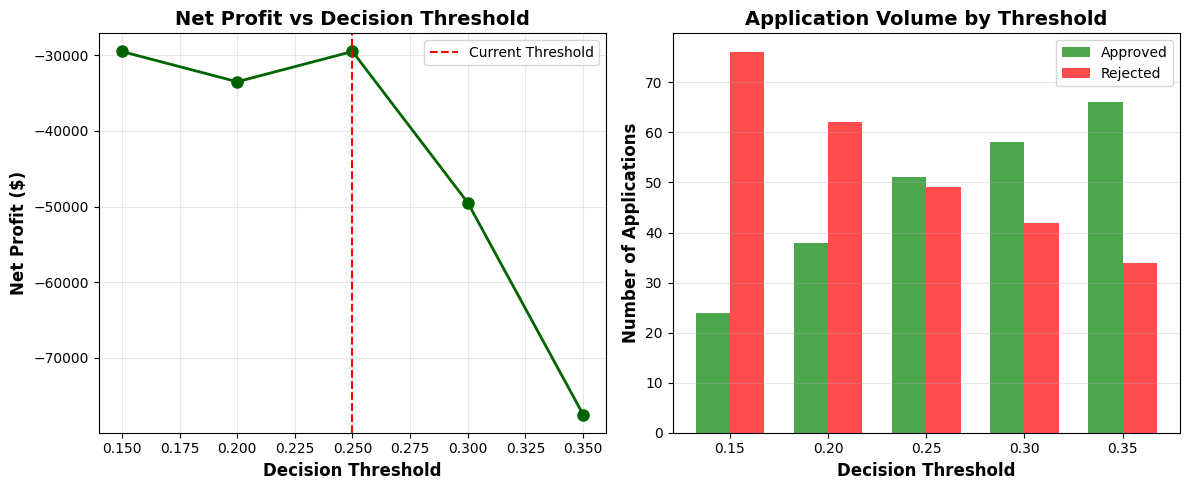


✓ Business impact analysis complete!


In [10]:
# ============================================================================
# 9. BUSINESS IMPACT ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SECTION 9: BUSINESS IMPACT ANALYSIS")
print("="*80)

# Ensure y_val_sample is defined (it should match X_val_sample)
# If you sampled X_val in an earlier section, do the same for y_val
if 'y_val_sample' not in locals():
    # Get the same indices used for X_val_sample
    sample_indices = X_val_sample.index
    y_val_sample = y_val.loc[sample_indices]
    print(f"✓ Created y_val_sample with {len(y_val_sample)} samples")

# Define business parameters
avg_loan_amount = 10000  # Average loan amount
profit_margin = 0.05     # 5% profit on good loans
loss_rate = 0.80         # 80% loss on defaulted loans

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_val_sample, y_pred).ravel()

print("\n📊 Confusion Matrix:")
print(f"   True Negatives (TN):  {tn:4d} - Correctly approved good borrowers")
print(f"   False Positives (FP): {fp:4d} - Incorrectly rejected good borrowers")
print(f"   False Negatives (FN): {fn:4d} - Incorrectly approved bad borrowers")
print(f"   True Positives (TP):  {tp:4d} - Correctly rejected bad borrowers")

# Calculate financial impact
profit_from_good_loans = tn * avg_loan_amount * profit_margin
loss_from_bad_loans = fn * avg_loan_amount * loss_rate
opportunity_cost = fp * avg_loan_amount * profit_margin

net_profit = profit_from_good_loans - loss_from_bad_loans - opportunity_cost

print("\n💰 Financial Impact:")
print(f"   Profit from approved good loans: ${profit_from_good_loans:,.2f}")
print(f"   Loss from approved bad loans:    ${loss_from_bad_loans:,.2f}")
print(f"   Opportunity cost (rejected good): ${opportunity_cost:,.2f}")
print(f"   {'='*50}")
print(f"   NET PROFIT:                       ${net_profit:,.2f}")

# Compare with different thresholds
print("\n📈 Threshold Sensitivity Analysis:")
print("-"*70)

thresholds_to_test = [0.15, 0.20, 0.25, 0.30, 0.35]
results = []

for thresh in thresholds_to_test:
    y_pred_temp = (y_pred_proba >= thresh).astype(int)
    tn_t, fp_t, fn_t, tp_t = confusion_matrix(y_val_sample, y_pred_temp).ravel()
    
    profit_t = tn_t * avg_loan_amount * profit_margin
    loss_t = fn_t * avg_loan_amount * loss_rate
    opp_cost_t = fp_t * avg_loan_amount * profit_margin
    net_t = profit_t - loss_t - opp_cost_t
    
    results.append({
        'threshold': thresh,
        'net_profit': net_t,
        'approved': tn_t + fn_t,
        'rejected': tp_t + fp_t
    })
    
    print(f"Threshold {thresh:.2f}: Net Profit = ${net_t:>12,.2f} | " 
          f"Approved = {tn_t + fn_t:4d} | Rejected = {tp_t + fp_t:4d}")

# Visualize threshold impact
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
thresholds = [r['threshold'] for r in results]
profits = [r['net_profit'] for r in results]
plt.plot(thresholds, profits, marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.axvline(x=0.25, color='red', linestyle='--', label='Current Threshold')
plt.xlabel('Decision Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Net Profit ($)', fontsize=12, fontweight='bold')
plt.title('Net Profit vs Decision Threshold', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
approved = [r['approved'] for r in results]
rejected = [r['rejected'] for r in results]
x = np.arange(len(thresholds))
width = 0.35
plt.bar(x - width/2, approved, width, label='Approved', color='green', alpha=0.7)
plt.bar(x + width/2, rejected, width, label='Rejected', color='red', alpha=0.7)
plt.xlabel('Decision Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Number of Applications', fontsize=12, fontweight='bold')
plt.title('Application Volume by Threshold', fontsize=14, fontweight='bold')
plt.xticks(x, [f'{t:.2f}' for t in thresholds])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Business impact analysis complete!")

In [11]:
# ============================================================================
# 10. FINAL SUMMARY & RECOMMENDATIONS
# ============================================================================
print("\n" + "="*80)
print("SECTION 10: FINAL SUMMARY & RECOMMENDATIONS")
print("="*80)

# Calculate performance metrics if not already defined
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

if 'accuracy_val' not in locals():
    accuracy_val = accuracy_score(y_val_sample, y_pred)
    precision_val = precision_score(y_val_sample, y_pred)
    recall_val = recall_score(y_val_sample, y_pred)
    f1_val = f1_score(y_val_sample, y_pred)
    roc_auc_val = roc_auc_score(y_val_sample, y_pred_proba)
    print("✓ Calculated performance metrics")

# Get top features if not already defined
if 'top_features_global' not in locals():
    # Calculate mean absolute SHAP values for global importance
    # Handle different SHAP value shapes
    if len(shap_values_class1.shape) == 2:
        mean_shap_values = np.abs(shap_values_class1).mean(axis=0)
    elif len(shap_values_class1.shape) == 3:
        mean_shap_values = np.abs(shap_values_class1[:, :, -1]).mean(axis=0)
    else:
        mean_shap_values = np.abs(shap_values_class1).mean(axis=0)
    
    # Ensure it's 1-dimensional
    mean_shap_values = mean_shap_values.flatten()
    
    feature_importance_df = pd.DataFrame({
        'feature': X_val_sample.columns,
        'importance': mean_shap_values
    }).sort_values('importance', ascending=False)
    top_features_global = feature_importance_df['feature'].head(5).tolist()
    print("✓ Identified top risk factors")

print("\n🎯 MODEL PERFORMANCE SUMMARY:")
print(f"   • Accuracy:  {accuracy_val:.1%}")
print(f"   • Precision: {precision_val:.1%}")
print(f"   • Recall:    {recall_val:.1%}")
print(f"   • F1-Score:  {f1_val:.1%}")
print(f"   • ROC AUC:   {roc_auc_val:.3f}")

print("\n💼 BUSINESS IMPACT:")
print(f"   • Estimated Net Profit: ${net_profit:,.2f}")
print(f"   • Applications Approved: {tn + fn} ({(tn + fn)/len(y_val_sample)*100:.1f}%)")
print(f"   • Applications Rejected: {tp + fp} ({(tp + fp)/len(y_val_sample)*100:.1f}%)")

print("\n🔑 KEY RISK FACTORS (Top 5):")
for i in range(min(5, len(top_features_global))):
    print(f"   {i+1}. {top_features_global[i]}")

print("\n📋 RECOMMENDATIONS:")
print("   1. Consider adjusting threshold based on business risk appetite")
print("   2. Monitor top risk factors closely in loan applications")
print("   3. Implement regular model retraining (quarterly recommended)")
print("   4. Set up automated alerts for high-risk applications")
print("   5. Create feedback loop to capture actual default outcomes")

print("\n📊 OPTIMAL THRESHOLD INSIGHT:")
best_threshold_result = max(results, key=lambda x: x['net_profit'])
print(f"   • Best performing threshold: {best_threshold_result['threshold']:.2f}")
print(f"   • Maximum net profit: ${best_threshold_result['net_profit']:,.2f}")
print(f"   • This would approve {best_threshold_result['approved']} applications")

print("\n" + "="*80)
print("✅ CREDIT RISK ANALYSIS COMPLETE!")
print("="*80)
print("\n🎓 Project successfully completed! Your credit risk model is ready for deployment.")


SECTION 10: FINAL SUMMARY & RECOMMENDATIONS
✓ Calculated performance metrics
✓ Identified top risk factors

🎯 MODEL PERFORMANCE SUMMARY:
   • Accuracy:  70.0%
   • Precision: 49.0%
   • Recall:    82.8%
   • F1-Score:  61.5%
   • ROC AUC:   0.801

💼 BUSINESS IMPACT:
   • Estimated Net Profit: $-29,500.00
   • Applications Approved: 51 (51.0%)
   • Applications Rejected: 49 (49.0%)

🔑 KEY RISK FACTORS (Top 5):
   1. checking_status
   2. duration
   3. savings_status
   4. credit_history
   5. credit_amount

📋 RECOMMENDATIONS:
   1. Consider adjusting threshold based on business risk appetite
   2. Monitor top risk factors closely in loan applications
   3. Implement regular model retraining (quarterly recommended)
   4. Set up automated alerts for high-risk applications
   5. Create feedback loop to capture actual default outcomes

📊 OPTIMAL THRESHOLD INSIGHT:
   • Best performing threshold: 0.15
   • Maximum net profit: $-29,500.00
   • This would approve 24 applications

✅ CREDIT RI